In [115]:
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
s=pd.read_csv('/content/netflix.csv')
s.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [117]:
#1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.
s.duplicated().value_counts()
s.drop_duplicates(inplace=True)

In [118]:
#2) Is there any Null Value present in any column ?
s.isnull().sum()


,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [119]:
#3)For 'House of Cards', what is the Show Id and Who is the Director of this show ?
s[s['Title'].str.contains('house of cards',case=False)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


<BarContainer object of 14 artists>

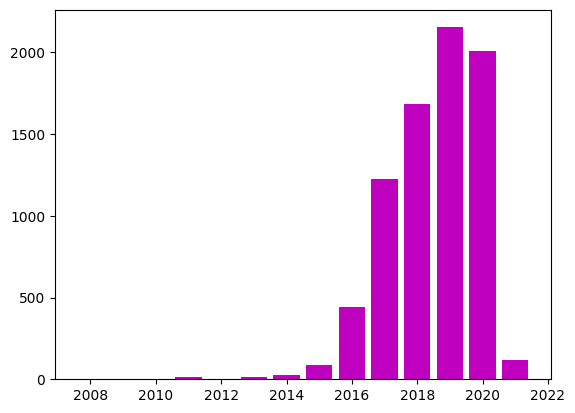

In [120]:
#4) In which year the highest number of the TV Shows & Movies were released ?
s['Release_Date']=pd.to_datetime(s['Release_Date'],format='mixed')
s['Release_Date'].dt.year.value_counts().head(1)
s['year']=s['Release_Date'].dt.year
p=s['Release_Date'].dt.year.value_counts()
plt.bar(p.keys(),p,color='m')

<BarContainer object of 2 artists>

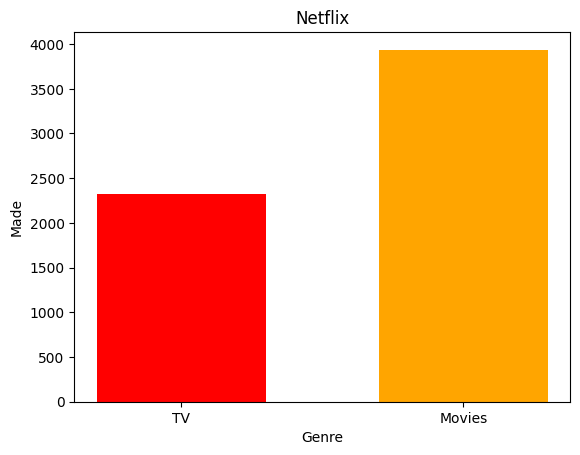

In [121]:
#5)How many Movies & TV Shows are in the dataset
tv=len(s[s['Type'].str.contains('TV',case=False)])
mo=len(s[s['Type'].str.contains('Movie',case=False)])
x=['TV','Movies']
plt.xlabel('Genre')
plt.ylabel('Made')
plt.title('Netflix')
plt.bar(x,[tv,mo],color=['r','orange'],width=0.6)

In [122]:
#6)Show all the Movies that were released in year 2009
s[s['year']==float(2009)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009.0
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009.0


In [123]:
#7) Show only the Titles of all TV Shows that were released in India only
p=s[s['Country']=='India']
p['Title']

,Title
8,706
9,1920
18,15-Aug
20,​​Kuch Bheege Alfaaz
21,​Goli Soda 2
...,...
7766,Zero
7771,Zindagi Na Milegi Dobara
7778,Zokkomon
7782,Zoo


In [124]:
#8)Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?
s['Director'].value_counts().head(10)

,count
Director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12
Steven Spielberg,10
David Dhawan,9


In [125]:
#9) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".
i=s['Category'].str.contains('movie',case=False).index
s[(s['Country']=='United Kingdom') | (s['Category']=='Movie')]


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020.0


In [139]:
#10) In how many movies/shows, Tom Cruise was cast?
import numpy as np
s['Cast']= s['Cast'].replace(np.nan,'')
len(s[s['Cast'].str.contains('Tom Cruise')])

2

In [140]:
#11) What are the different Ratings defined by Netflix ?
s['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [144]:
#12)How many Movies got the 'TV-14' rating, in Canada?
k=s[s['Country']=='Canada']
len(k[k['Rating']=='TV-14'])

23

In [149]:
#13)How many TV Shows got the 'R' rating, after year 2018?
k=s[s['year']>=float(2018)]
len(k[k['Rating']=='R'])

581

In [229]:
#14) What is the maximum duration of a Movie/Show on Netflix ?
s[['Time','Dur Type']]=s['Duration'].str.split(' ',expand=True)
s['Time']=s['Time'].astype(int)
s['Time'].max()

312

In [165]:
#15) Which individual country has the Highest No. of TV Shows ?
k=s[s['Category']=='TV Show']
k.groupby('Country')['Category'].value_counts().sort_values(ascending=False).head(1)

,,count
Country,Category,
United States,TV Show,705
